# IMAGE STITCHING

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = "./data/data_image_stitching/"

## 1. Determine correspondences between images

### 1.1. Detecting feature points and feature descriptor

In [26]:
def get_feature_points_and_desciptors(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(gray, None)
    return gray, kp, des

In [27]:
# Test images
path_img_1 = DATA_PATH + 'im1.png'
path_img_2 = DATA_PATH + 'im2.png'

# Read the images
img_1 = cv2.imread(path_img_1)
img_2 = cv2.imread(path_img_2)

fig, axes = plt.subplots(1,2, figsize=(8,3))
fig.suptitle("Original test images", fontsize=20)
axes[0].imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))

'\nfig, axes = plt.subplots(1,2, figsize=(8,3))\nfig.suptitle("Original test images", fontsize=20)\naxes[0].imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))\naxes[1].imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))\n'

In [28]:
# Get feature points and Descriptors on test images
gimg_1, kp_1, desc_1 = get_feature_points_and_desciptors(img_1)
gimg_2, kp_2, desc_2 = get_feature_points_and_desciptors(img_2)

fimg_1 = cv2.drawKeypoints(gimg_1,kp_1,img_1)
fimg_2 = cv2.drawKeypoints(gimg_2,kp_2,img_2)

fig, axes = plt.subplots(1,2, figsize=(57,18))
fig.suptitle("Detected feature points on test images", fontsize=40)
axes[0].imshow(cv2.cvtColor(fimg_1, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(fimg_2, cv2.COLOR_BGR2RGB))

'\nfig, axes = plt.subplots(1,2, figsize=(57,18))\nfig.suptitle("Detected feature points on test images", fontsize=40)\naxes[0].imshow(cv2.cvtColor(fimg_1, cv2.COLOR_BGR2RGB))\naxes[1].imshow(cv2.cvtColor(fimg_2, cv2.COLOR_BGR2RGB))\n'

### 1.2. Feature Matching

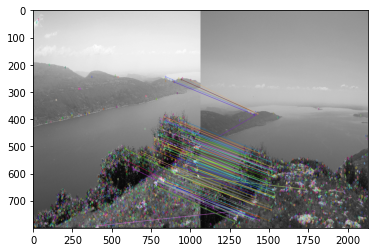

In [29]:
from scipy.spatial.distance import cdist

def match_feature_points(fd_1, fd_2, threshold):
    # Calculate euclidiean distance betweek feature descriptors
    distance_between_points = cdist(fd_1, fd_2, 'euclidean')

    # Sort the distances and keep the indices
    sorted_distance = np.sort(distance_between_points, axis=1)
    indices = np.argsort(distance_between_points, axis=1)

    # Calculate Nearest Neighbor Distance Ratio
    nearest_neighbor = sorted_distance[:, 0]
    sec_nearest_neighbor = sorted_distance[:, 1]
    nndr = np.divide(nearest_neighbor, sec_nearest_neighbor)

    # Get the features that NNDR is less the threshold
    good_points = np.where(nndr < threshold)

    # Keep valid feature indices
    good_points_distance = sorted_distance[good_points, 0]
    good_points_indices = indices[good_points,0]
    return np.column_stack((good_points[0], good_points_indices[0], good_points_distance[0]))

def convert_to_dmatch(elem):
    return cv2.DMatch(int(elem[0]), int(elem[1]), 0,elem[2])

def prepare_matches_for_drawing(matched_features):
    matched_features_in_dmatch = []
    for elem in matched_features:
        matched_features_in_dmatch.append(convert_to_dmatch(elem))
    return matched_features_in_dmatch

matched_features = match_feature_points(desc_1, desc_2, 0.65)
matched_features_in_dmatch = prepare_matches_for_drawing(matched_features)
matched_features_img = cv2.drawMatches(img_1, kp_1, img_2, kp_2, matched_features_in_dmatch, img_2, flags=2)
plt.imshow(cv2.cvtColor(matched_features_img, cv2.COLOR_BGR2RGB), aspect='auto')